In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
%matplotlib inline
np.random.seed(7)

# EDA

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


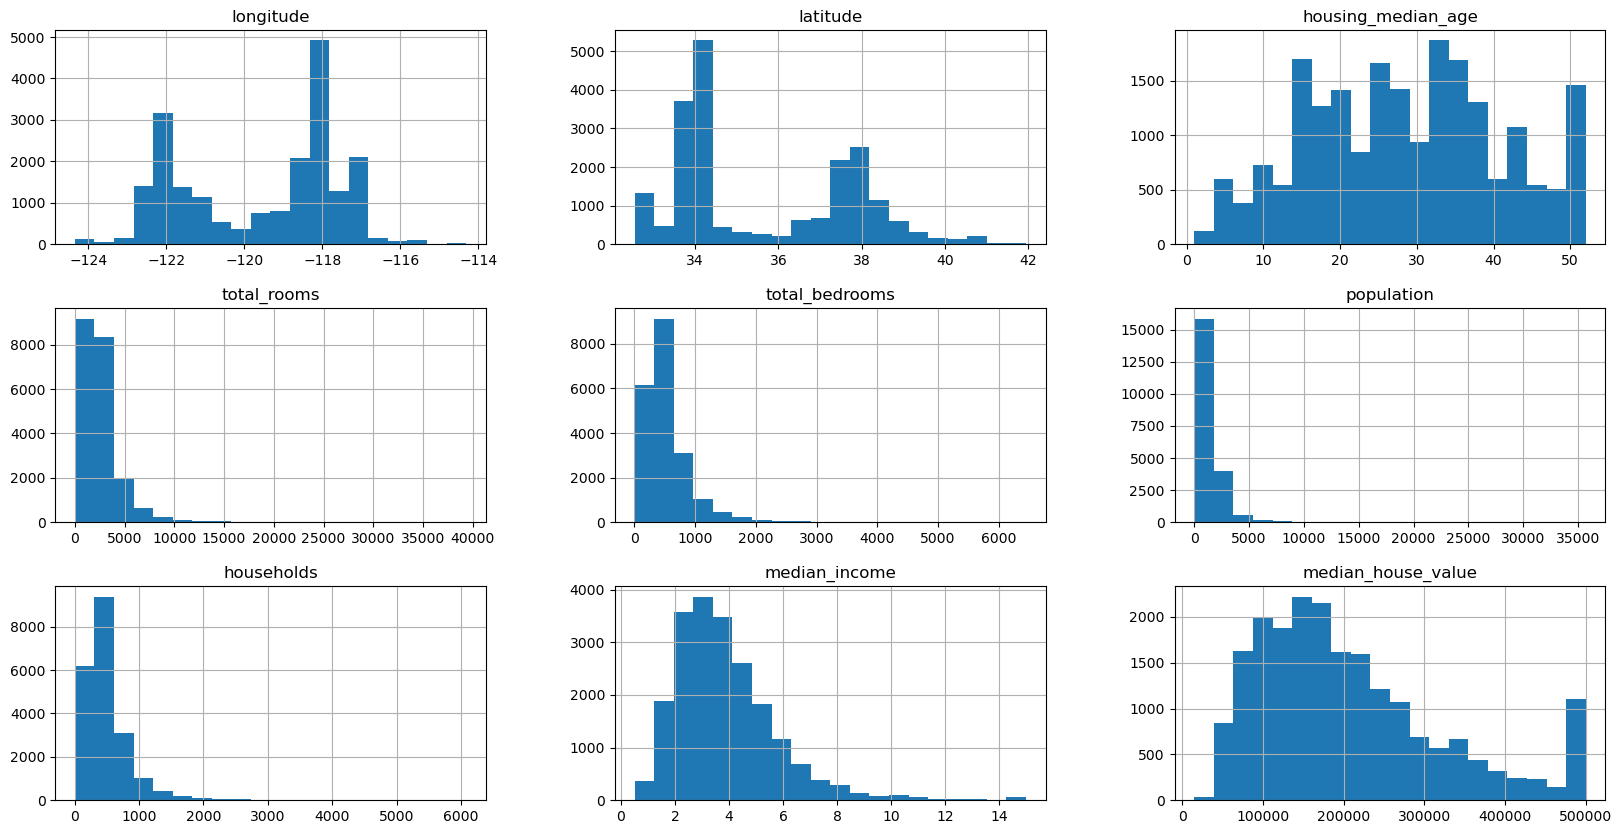

In [5]:
df.hist(bins=20,figsize=(20,10))
plt.show()

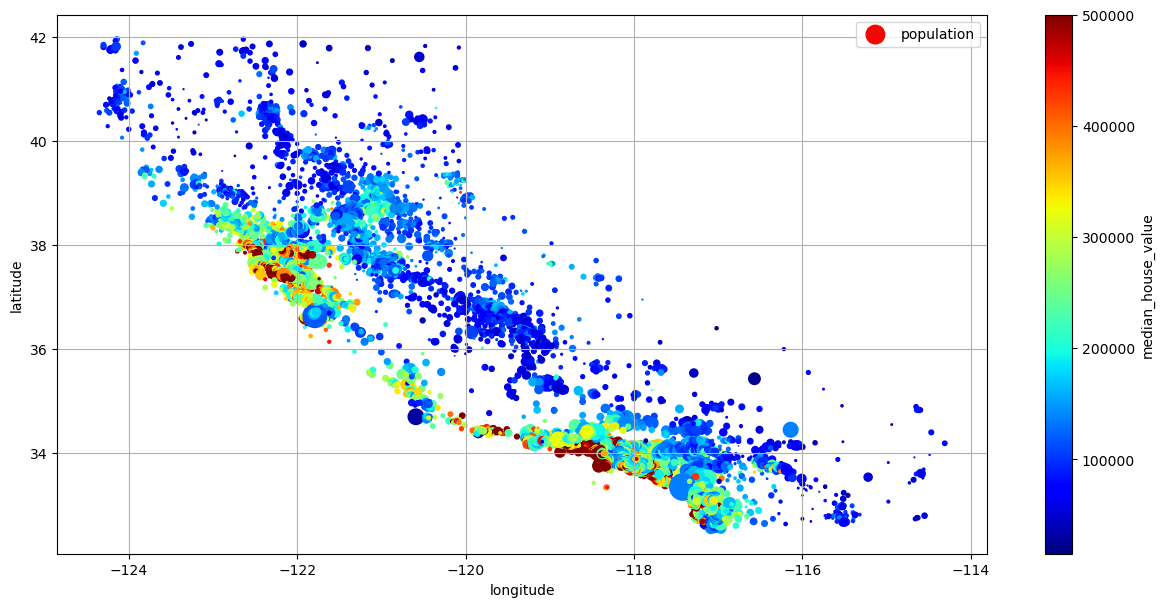

In [6]:
df.plot(kind="scatter",x="longitude",y="latitude",grid=True,
        s=df["population"]/100,label="population",
        c="median_house_value",cmap="jet",
        figsize=(15,7),legend=True)
plt.show()

# Preprocessing

## Feature Engineering

In [7]:
num_cols = df.select_dtypes(exclude="O").columns
cat_cols = df.select_dtypes(include="O").columns

In [8]:
corr_matrix = df[num_cols].corr()

*The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation, When the coefficient is close to –1, it means
that there is a strong negative correlation*

In [9]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

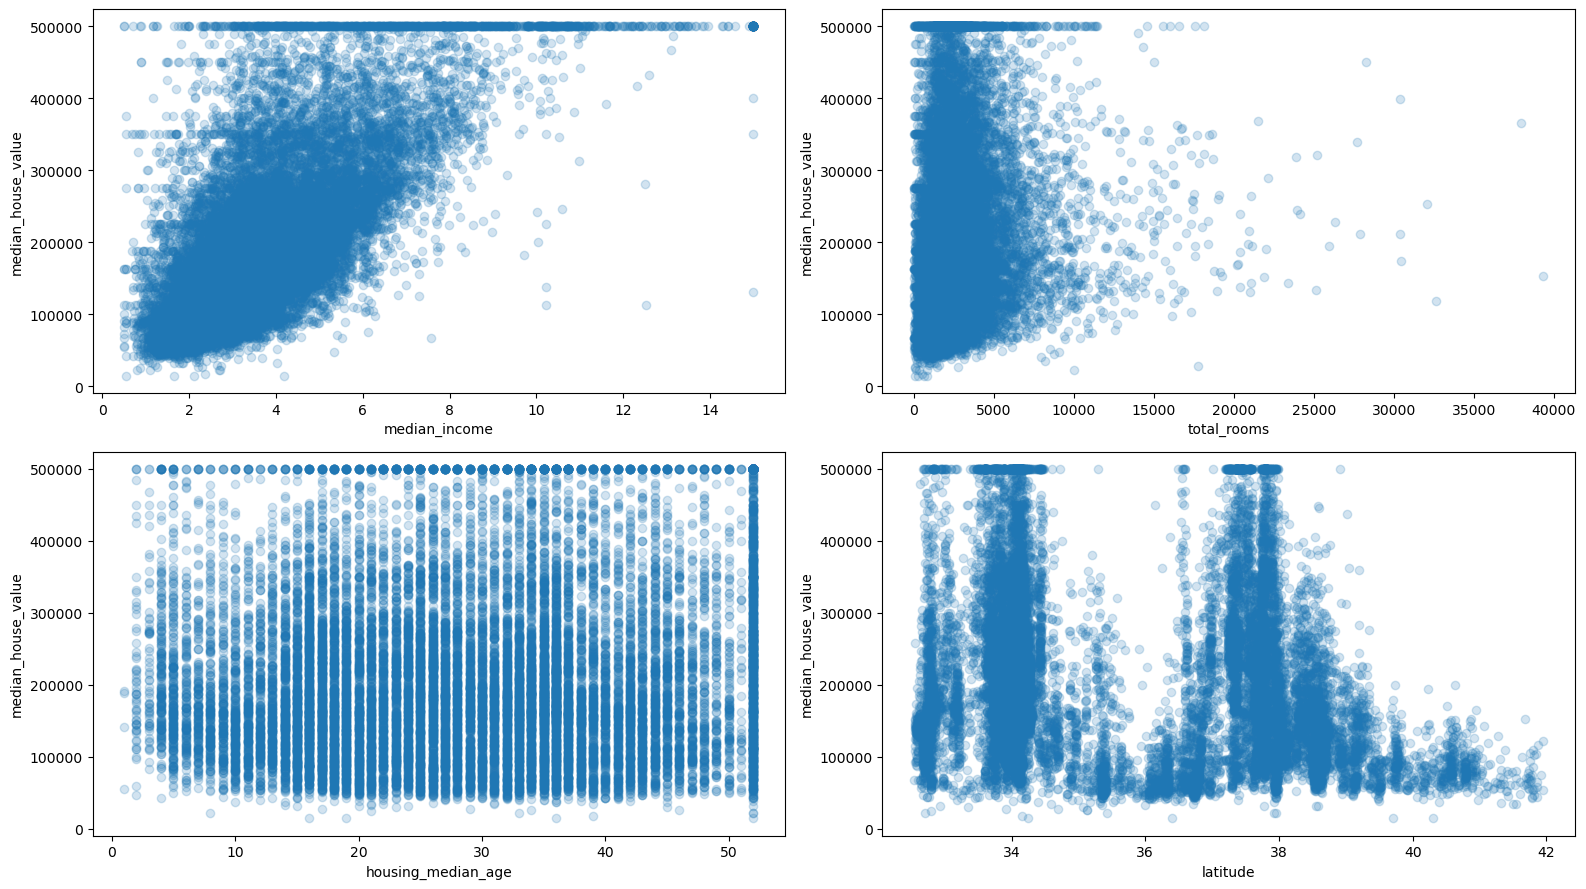

In [10]:
features = ["median_income","total_rooms","housing_median_age","latitude"]
plt.figure(figsize=(16,9))
for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    plt.scatter(data=df[num_cols],x=feature,y="median_house_value",alpha=.2)
    plt.xlabel(feature)
    plt.ylabel("median_house_value")
plt.tight_layout()
plt.show()

*he total number of rooms in a district is not very useful if you don’t know how many households
there are. What you really want is the number of rooms per household. Similarly,
the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems
like an interesting attribute combination to look at*

In [11]:
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["people_per_house"] = df["population"] / df["households"]

In [12]:
num_cols = df.select_dtypes(exclude="O").columns

In [13]:
corr_matrix = df[num_cols].corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

## Handling Null Values

In [14]:
temp_df = df.copy()

In [15]:
imputer = SimpleImputer(strategy="median")
temp_df[num_cols] = imputer.fit_transform(temp_df[num_cols])

## Handling Categorical Columns

In [16]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,drop='first')
encoded_cat = encoder.fit_transform(temp_df[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cat,columns=encoder.get_feature_names_out(cat_cols))
temp_df.drop(columns=cat_cols,inplace=True)
temp_df = pd.concat([temp_df, encoded_cat_df], axis=1)

In [17]:
temp_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0.0,0.0,1.0,0.0


In [18]:
print("Number of nulls: ",sum(temp_df.isna().sum()))

Number of nulls:  0


## Features Scaling With MinMax Scaler

In [19]:
data = temp_df.copy()

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[num_cols] =scaler.fit_transform(data[num_cols])

In [25]:
data[num_cols].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.043512,0.051768,0.001499
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.038224,0.061996,0.001141
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.052756,0.032796,0.001698
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.035241,0.093843,0.001493
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.038534,0.080107,0.001198


In [26]:
X = data.drop(columns="median_house_value")
y = data["median_house_value"]

In [27]:
X.shape,y.shape

((20640, 15), (20640,))

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=7)

In [29]:
x_train.shape,x_test.shape

((14448, 15), (6192, 15))

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
model = LinearRegression()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
print("------------> Train Result <-------------")
print("Mean Squared Error = ", mean_squared_error(train_pred,y_train))
print("R Squared Score = ",r2_score(train_pred,y_train))
print("------------> Test Result <---------------")
print("Mean Squared Error = ", mean_squared_error(test_pred,y_test))
print("R Squared Score = ",r2_score(test_pred,y_test))

------------> Train Result <-------------
Mean Squared Error =  0.01963542106661764
R Squared Score =  0.46764021759259455
------------> Test Result <---------------
Mean Squared Error =  0.019624111340536418
R Squared Score =  0.47385500863450225


# Save The Model

In [37]:
import pickle
import os
with open("model.pkl","wb") as file:
    pickle.dump(model,file)

## Feature Scaling With Standarization

In [38]:
data = temp_df.copy()

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[num_cols] =scaler.fit_transform(data[num_cols])

In [40]:
data[num_cols].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.628559,-1.149930,-0.049597
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.327041,-0.990381,-0.092512
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.155620,-1.445865,-0.025843
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.493627,-0.050329
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.707889,-0.085616


In [41]:
X = data.drop(columns="median_house_value")
y = data["median_house_value"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=7)


In [42]:
model = LinearRegression()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
print("------------> Train Result <-------------")
print("Mean Squared Error = ", mean_squared_error(train_pred,y_train))
print("R Squared Score = ",r2_score(train_pred,y_train))
print("------------> Test Result <---------------")
print("Mean Squared Error = ", mean_squared_error(test_pred,y_test))
print("R Squared Score = ",r2_score(test_pred,y_test))

------------> Train Result <-------------
Mean Squared Error =  0.3468723647095253
R Squared Score =  0.46764021759259455
------------> Test Result <---------------
Mean Squared Error =  0.3466725711111756
R Squared Score =  0.4738550086345025
